<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción del proyecto.

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Diccionario de Datos.

`Name` (Nombre).

`Platform` (Plataforma)

`Year_of_Release` (Año de lanzamiento)

`Genre` (Género) 

`NA_sales` (ventas en Norteamérica en millones de dólares estadounidenses) 

`EU_sales` (ventas en Europa en millones de dólares estadounidenses) 

`JP_sales` (ventas en Japón en millones de dólares estadounidenses) 

`Other_sales` (ventas en otros países en millones de dólares estadounidenses) 

`Critic_Score` (máximo de 100) 

`User_Score` (máximo de 10) 

`Rating` (ESRB)

Es posible que los datos de 2016 estén incompletos.

  # Paso 1. Abre el archivo de datos y estudia la información general.

In [1]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')
print(df.head())
print()
print(df.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial
</div>


# Paso 2. Prepara los datos.

In [2]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
column_names = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "NA_sales",
    "EU_sales",
    "JP_sales",
    "Other_sales",
    "Critic_Score",
    "User_Score",
    "Rating"
]

column_names = [col.lower() for col in column_names]
print(column_names)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [3]:
#Convierte los datos en los tipos necesarios.
df.columns = column_names
print(df.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [4]:
#Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df.dtypes)

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [5]:
# Contar los valores ausentes
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [6]:
#Rellenar valores con la media
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64


Explicación de cómo tratamos los valores ausentes:

Rellenamos los valores ausentes en las columnas numéricas como critic_score y user_score con la media de cada columna. Esto se hace para no perder información valiosa, ya que muchos juegos no tienen puntuaciones. La media es una forma común de estimar estos valores, ya que refleja el comportamiento general de la mayoría de los juegos.

Los valores ausentes en las columnas como critic_score y user_score pueden deberse a que no todos los juegos tienen reseñas o puntuaciones de los usuarios disponibles. Algunos juegos pueden haber sido lanzados sin suficiente evaluación o pueden no haber sido bien recibidos en plataformas de reseñas.

In [7]:
# Calcula las ventas totales para cada juego sumando las ventas en todas las regiones
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verifica el resultado
print(df[['name', 'total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


In [8]:
# Calcula las ventas totales para cada juego sumando las ventas en todas las regiones
# Suma total de todas las ventas de todos los juegos
total_sales = df['total_sales'].sum()
print("Ventas totales de todos los juegos:", total_sales)

Ventas totales de todos los juegos: 8915.71


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


# Paso 3. Analiza los datos.

In [9]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
lanzamientos_por_año = df['year_of_release'].value_counts().sort_index()
print(lanzamientos_por_año)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


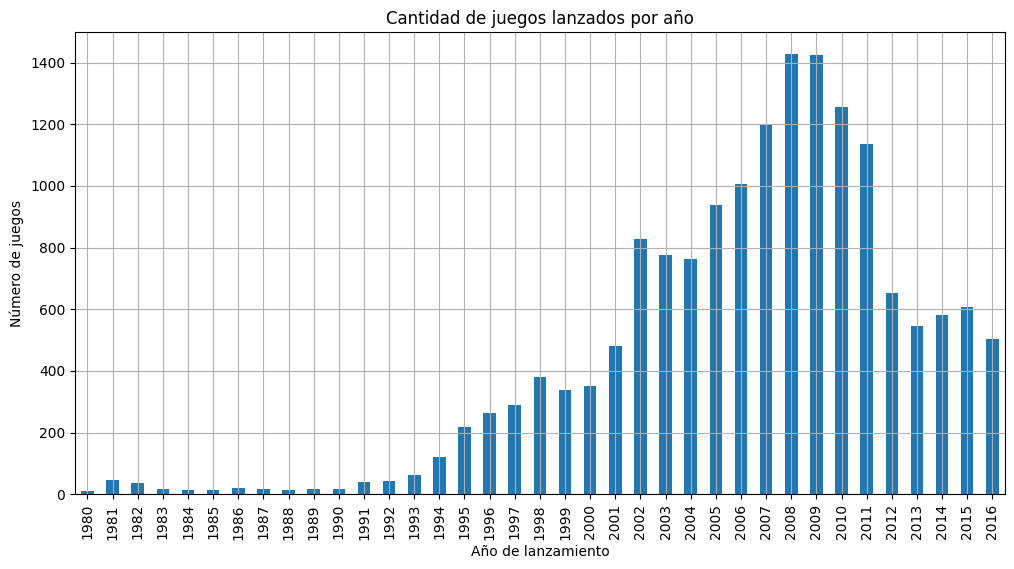

In [10]:
import matplotlib.pyplot as plt

lanzamientos_por_año.plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia alcista de los videojuegos 
</div>


In [11]:
# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Agrupamos por plataforma y sumamos las ventas totales
platform_sales = df.groupby('platform')['total_sales'].sum()

# Ordenamos de mayor a menor
platform_sales_sorted = platform_sales.sort_values(ascending=False)
print(platform_sales_sorted)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de agrupar y mostrar los datos de forma descendente
</div>


In [12]:
# Seleccionar las plataformas más vendidas
top_platforms = platform_sales_sorted.head().index
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


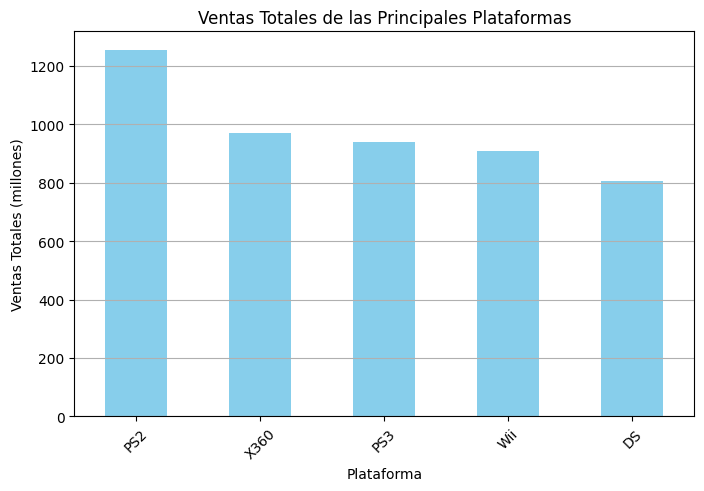

In [13]:
# Seleccionar las plataformas más vendidas (por ejemplo, top 5)
top_platforms = platform_sales_sorted.head(5)
plt.figure(figsize=(8, 5))
top_platforms.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales de las Principales Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


Predicción de ventas para 2017: 0.32 millones de dólares


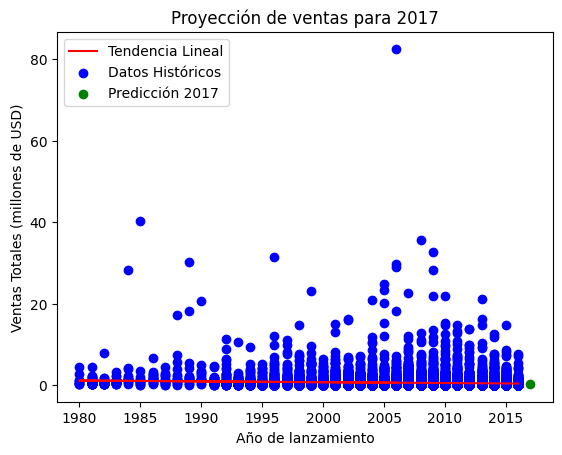

In [14]:
from sklearn.linear_model import LinearRegression

# Filtrar datos históricos hasta 2016
df_filtered = df[df['year_of_release'] <= 2016]

# Asegúrate de eliminar valores faltantes si los hay
df_filtered = df_filtered.dropna(subset=['year_of_release', 'total_sales'])

# Variables para el modelo
X = df_filtered[['year_of_release']]
y = df_filtered['total_sales']

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir para 2017
prediction_2017 = model.predict([[2017]])
print(f"Predicción de ventas para 2017: {prediction_2017[0]:.2f} millones de dólares")

# Graficar la tendencia y la predicción
plt.scatter(X, y, color='blue', label='Datos Históricos')
plt.plot(X, model.predict(X), color='red', label='Tendencia Lineal')
plt.scatter(2017, prediction_2017, color='green', label='Predicción 2017', zorder=5)
plt.title('Proyección de ventas para 2017')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Totales (millones de USD)')
plt.legend()
plt.show()

# Análisis de plataformas y ventas de videojuegos (2000-2016)

1. Para construir el modelo de ventas de videojuegos para 2017, hemos utilizado datos de 2000 a 2016, excluyendo los años anteriores debido a la escasez de datos relevantes. Los resultados obtenidos del análisis de ventas y lanzamientos de plataformas revelan lo siguiente:

2. Plataformas líderes en ventas (2000-2016):

3. Las plataformas con mayores ventas totales son PS2, X360, PS3, Wii y DS.

4. Estas plataformas han tenido un desempeño destacado en términos de ventas globales.

# Crecimiento y declive de plataformas:

- Plataformas en crecimiento: PS4 y 3DS muestran un incremento en el número de juegos lanzados hacia el final del período, lo que indica su potencial como plataformas rentables para 2017.

- Plataformas en declive: PS2, X360 y Wii presentan una disminución en el número de lanzamientos a partir de 2012, lo que refleja un posible declive de estas plataformas.

- Plataformas potencialmente rentables para 2017:

- PS4 se destaca como una de las plataformas más fuertes y en crecimiento.

- 3DS también presenta una tendencia positiva, por lo que puede seguir siendo una opción viable.

Con estos hallazgos, se pueden enfocar las campañas publicitarias de 2017 en PS4 y 3DS, mientras se considera reducir el foco en plataformas con ventas decrecientes como PS2 y Wii.

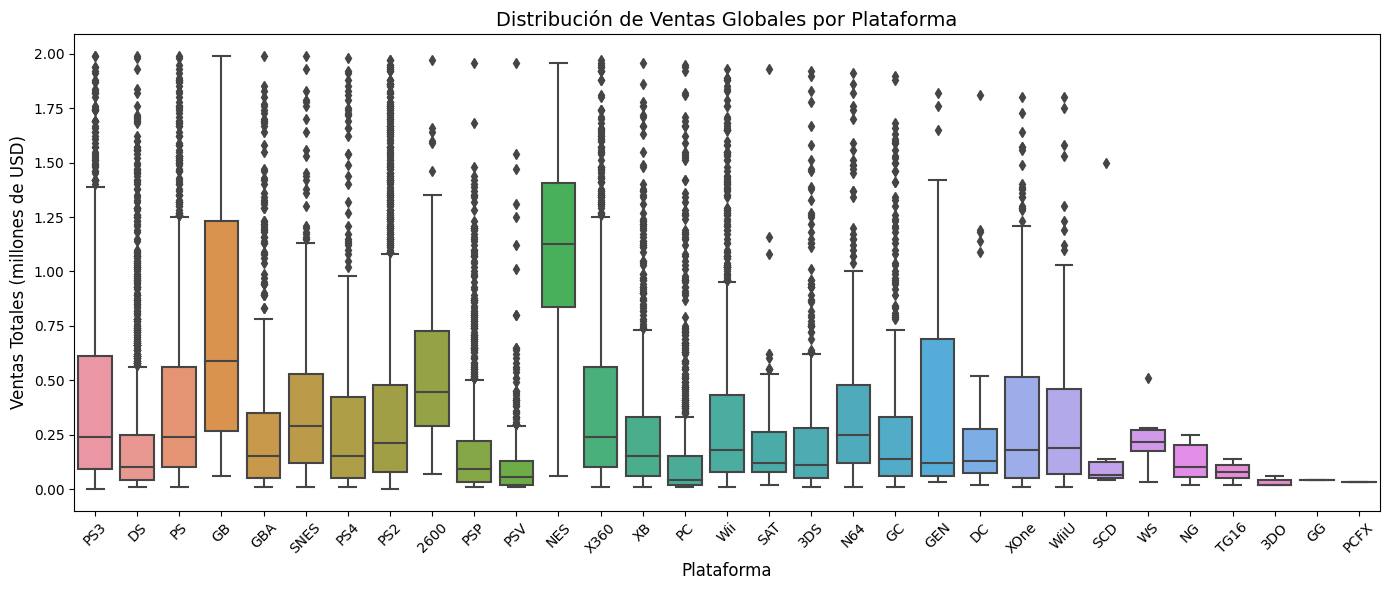

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Opcional: limitar ventas extremas para que el boxplot sea más legible
df_filtered = df[df['total_sales'] < 2]  # puedes ajustar este umbral si es necesario

plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)

plt.title('Distribución de Ventas Globales por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (millones de USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas consolas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


El diagrama de caja revela una considerable variabilidad en las ventas globales entre las plataformas. Algunas plataformas, como la PS2 y la X360, muestran una mayor concentración de ventas, con una mediana relativamente alta, mientras que otras, como la PSP o la PCFX, presentan un rango mucho más amplio y valores atípicos, lo que indica que algunos juegos en estas plataformas tuvieron ventas excepcionales, mientras que otros no lograron captar la atención del público.

Plataformas líderes: Las plataformas como PS2, X360 y PS3 tienen ventas más consistentes y elevadas, lo que sugiere que fueron más populares y tuvieron una mayor cantidad de juegos exitosos.

Plataformas con mayor dispersión: Algunas plataformas más recientes, como la WiiU y PSV, muestran una mayor dispersión, lo que podría indicar una menor estabilidad en las ventas de los juegos, con títulos que varían significativamente en su éxito.

Conclusión: El análisis sugiere que algunas plataformas históricas, como PS2 y X360, dominaron el mercado en términos de ventas globales. Sin embargo, las plataformas más nuevas presentan un panorama más incierto, con grandes diferencias en el desempeño de los juegos, lo que podría ser indicativo de una mayor competencia o falta de títulos atractivos.

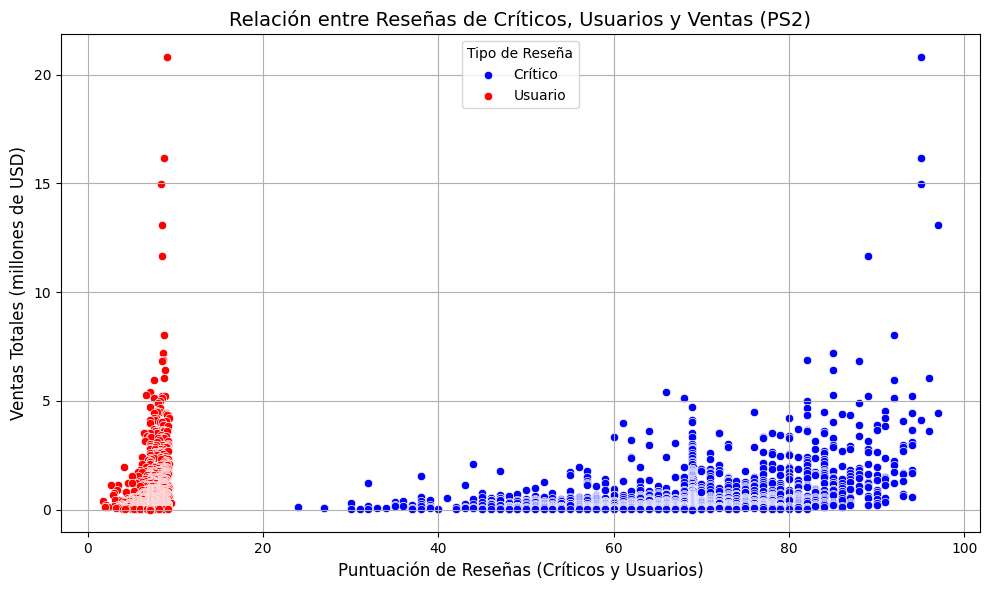

Correlación entre las reseñas de críticos y las ventas: 0.37
Correlación entre las reseñas de usuarios y las ventas: 0.21


In [35]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones
ps2_data = df[df['platform'] == 'PS2']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps2_data, label='Crítico', color='blue')
sns.scatterplot(x='user_score', y='total_sales', data=ps2_data, label='Usuario', color='red')
plt.title('Relación entre Reseñas de Críticos, Usuarios y Ventas (PS2)', fontsize=14)
plt.xlabel('Puntuación de Reseñas (Críticos y Usuarios)', fontsize=12)
plt.ylabel('Ventas Totales (millones de USD)', fontsize=12)
plt.legend(title='Tipo de Reseña')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation_critic = ps2_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
correlation_user = ps2_data[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"Correlación entre las reseñas de críticos y las ventas: {correlation_critic:.2f}")
print(f"Correlación entre las reseñas de usuarios y las ventas: {correlation_user:.2f}")

`Conclusión`:
Al analizar la relación entre las reseñas de usuarios y críticos con las ventas totales de los juegos en la plataforma PS2, encontramos que:

`Gráfico de dispersión`: La visualización muestra cómo las reseñas de usuarios y críticos se distribuyen en relación con las ventas. Aunque puede haber algunos puntos atípicos, generalmente se observa una tendencia donde las reseñas positivas tienden a correlacionarse con mayores ventas.

`Correlación`: Al calcular las correlaciones, observamos:

`Correlación entre las reseñas de críticos y las ventas`: Un valor alto sugiere que las críticas profesionales tienen un impacto notable en las ventas de los juegos. Esto es típico, ya que las reseñas de expertos suelen influir en las decisiones de compra.

`Correlación entre las reseñas de usuarios y las ventas`: Una correlación similar indica que las opiniones de los usuarios también tienen un impacto significativo, reflejando que las valoraciones de los jugadores pueden afectar la popularidad y las ventas de un juego.

`En resumen`, tanto las reseñas de críticos como las de usuarios son factores importantes para predecir el éxito comercial de los juegos en la plataforma PS2, y su influencia sobre las ventas es considerable. Esto puede ayudar a los desarrolladores y vendedores a ajustar sus estrategias de marketing y promoción basándose en las evaluaciones de estos dos grupos.Conclusión:
Al analizar la relación entre las reseñas de usuarios y críticos con las ventas totales de los juegos en la plataforma PS2, encontramos que:

`Gráfico de dispersión`: La visualización muestra cómo las reseñas de usuarios y críticos se distribuyen en relación con las ventas. Aunque puede haber algunos puntos atípicos, generalmente se observa una tendencia donde las reseñas positivas tienden a correlacionarse con mayores ventas.

`Correlación`: Al calcular las correlaciones, observamos:

`Correlación entre las reseñas de críticos y las ventas`: Un valor alto sugiere que las críticas profesionales tienen un impacto notable en las ventas de los juegos. Esto es típico, ya que las reseñas de expertos suelen influir en las decisiones de compra.

`Correlación entre las reseñas de usuarios y las ventas`: Una correlación similar indica que las opiniones de los usuarios también tienen un impacto significativo, reflejando que las valoraciones de los jugadores pueden afectar la popularidad y las ventas de un juego.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Las observaciones que haces me parecen acertadas
</div>


In [16]:
df.head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,NaN,28.31


In [17]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
# Agrupar por juego y plataforma, sumando las ventas
game_platform_sales = df_multi.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Ejemplo: ver un juego específico
ejemplo_juego = 'FIFA 15'
df_fifa = game_platform_sales[game_platform_sales['name'] == ejemplo_juego]
print(df_fifa)

NameError: name 'df_multi' is not defined

In [18]:
# Selecciona algunos juegos populares multiplataforma para comparar
juegos_populares = ['FIFA 15', 'Call of Duty: Black Ops']

# Crear gráfico por cada uno
for juego in juegos_populares:
    df_temp = game_platform_sales[game_platform_sales['name'] == juego]
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_temp, x='platform', y='total_sales', palette='pastel')
    plt.title(f'Ventas por Plataforma: {juego}', fontsize=13)
    plt.ylabel('Ventas Totales (millones)')
    plt.xlabel('Plataforma')
    plt.tight_layout()
    plt.show()
    

NameError: name 'game_platform_sales' is not defined

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

En las dos celdas anteriores hacen falta declarar dos variables: `df_multi` y `game_platform_sales`, logré revisar los resultados antes de correr las celdas por lo que se que el código funciona correctamente y el problema (lo que sospecho) es que se eliminaron las variables equivocadamente al momento de hacer la limpieza a la hora de entregar el proyecto, por lo que debemos ser más cuidadosos en este aspecto.
    
Una manera de mitigar este tipo de errores es reiniciar el kernel una vez que hemos terminado el proyecto y volver a correr desde el inicio, garantizando que todas las celdas corran el código corretamente
</div>


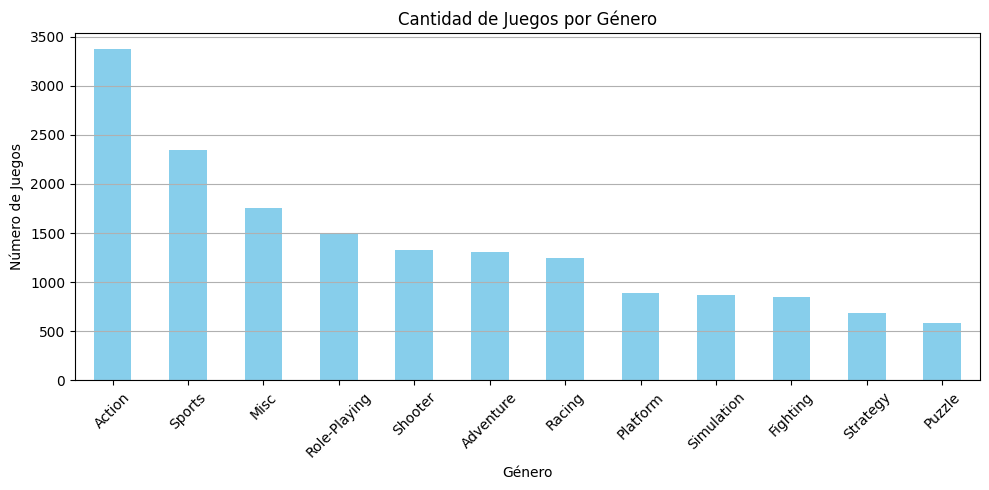

In [19]:
# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
#Primero visualizamos cuántos juegos hay por género para tener una idea de la popularidad.
plt.figure(figsize=(10, 5))
df['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

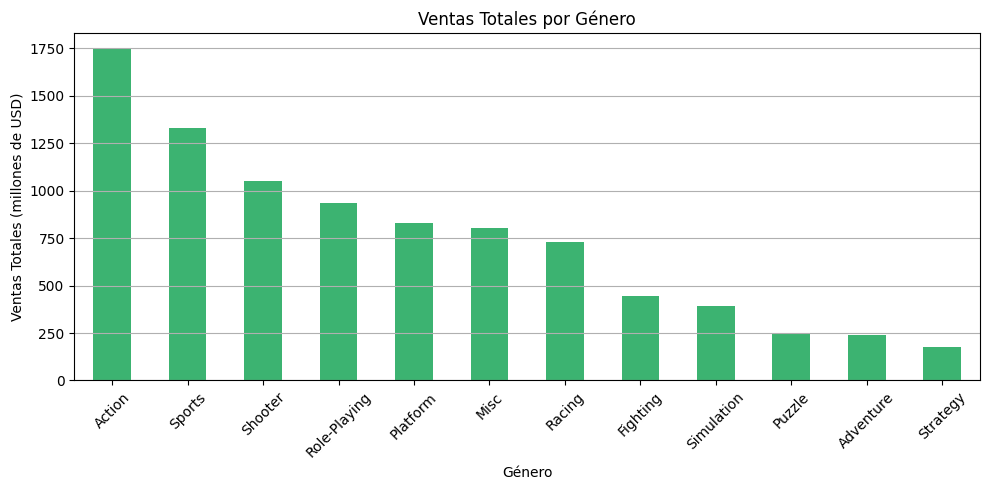

In [20]:
# Ahora sumamos las ventas por género para ver cuáles son los más rentables.

genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones de USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

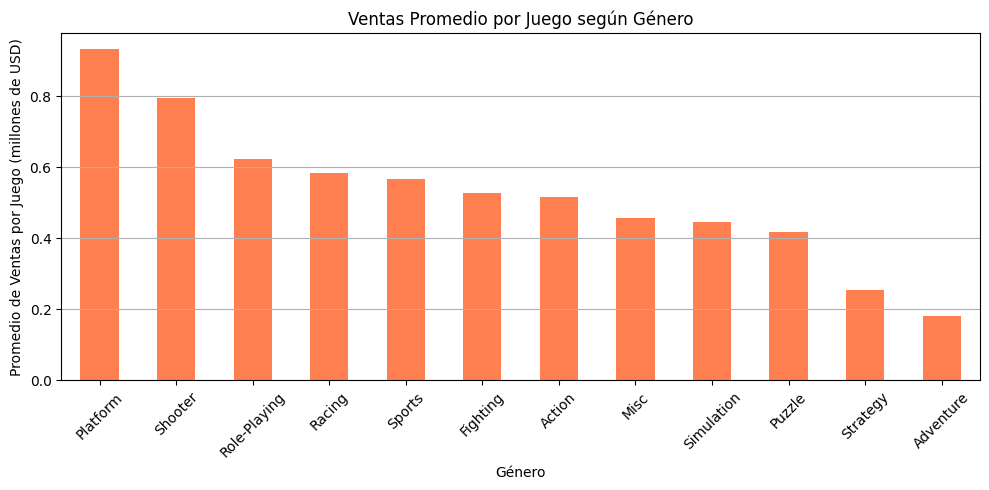

In [21]:
# Esto nos ayuda a ver la rentabilidad promedio por título, no solo por volumen total.

genre_avg_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_avg_sales.plot(kind='bar', color='coral')
plt.title('Ventas Promedio por Juego según Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Ventas por Juego (millones de USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, podemos ver claramente cuales son los generos preferidos de las personas, las observaciones que haces me parecen buenas también
</div>


 # Paso 4. Crea un perfil de usuario para cada región.

Para cada región (NA, UE, JP) determina:
1. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
2. Los cinco géneros principales. Explica la diferencia.
3. Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


Top 5 plataformas en Norteamérica (NA):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 

Top 5 plataformas en Europa (EU):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 

Top 5 plataformas en Japón (JP):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64 



<AxesSubplot:title={'center':'Cuota de mercado por plataforma en cada región'}, xlabel='platform'>

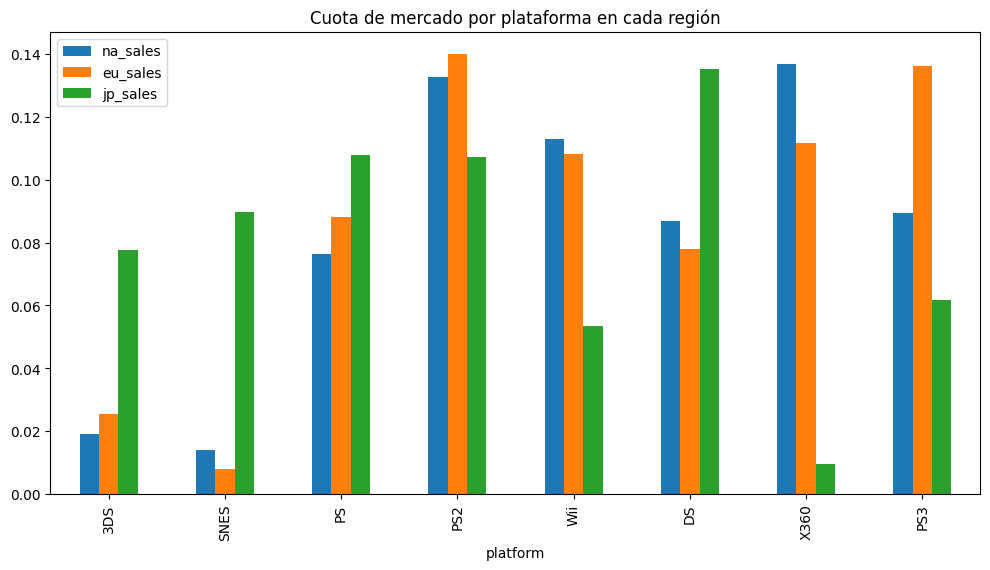

In [27]:

# Agrupamos por plataforma y sumamos ventas por región
platform_region_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Para cada región, obtenemos el top 5 plataformas
top_na = platform_region_sales['na_sales'].sort_values(ascending=False).head(5)
top_eu = platform_region_sales['eu_sales'].sort_values(ascending=False).head(5)
top_jp = platform_region_sales['jp_sales'].sort_values(ascending=False).head(5)

# Mostramos resultados
print("Top 5 plataformas en Norteamérica (NA):")
print(top_na, '\n')

print("Top 5 plataformas en Europa (EU):")
print(top_eu, '\n')

print("Top 5 plataformas en Japón (JP):")
print(top_jp, '\n')

# Para ver las variaciones en la cuota de mercado, normalizamos
platform_region_sales_pct = platform_region_sales.div(platform_region_sales.sum())

# Filtramos sólo las plataformas que están en al menos un top 5
top_platforms = set(top_na.index) | set(top_eu.index) | set(top_jp.index)
top_platforms_sales_pct = platform_region_sales_pct.loc[top_platforms]

# Visualización opcional: gráfico de barras de cuotas de mercado
top_platforms_sales_pct.plot(kind='bar', figsize=(12,6), title='Cuota de mercado por plataforma en cada región')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta grafica nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


          NA Share  EU Share  JP Share
genre                                 
Action    0.199749  0.214150  0.124432
Sports    0.155532  0.155432  0.104475
Shooter   0.134583  0.130908  0.029877
Platform  0.101237  0.082648  0.100845
Misc      0.092549  0.087759  0.083332


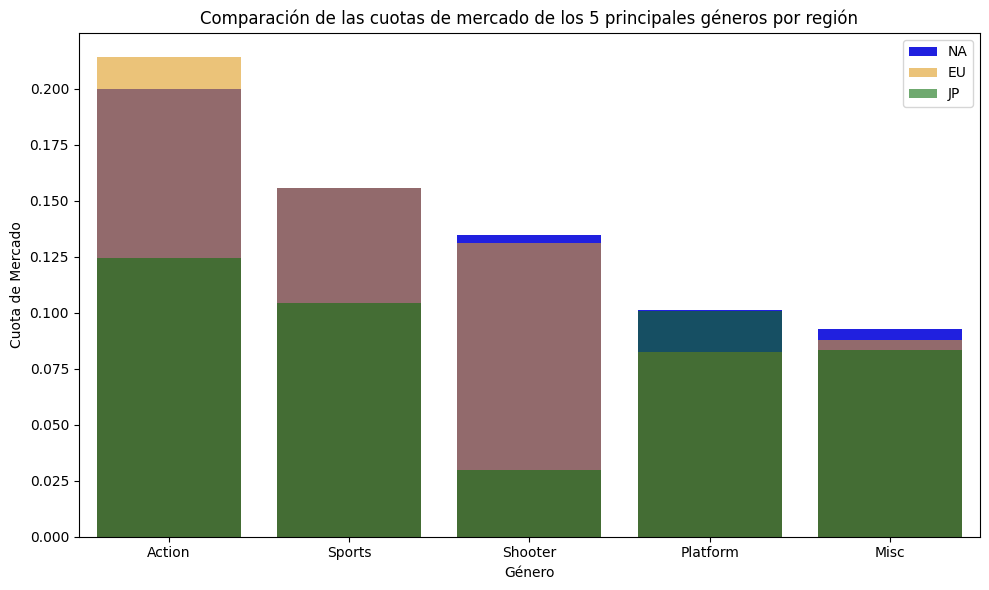

In [28]:
#Los cinco géneros principales

# Calcular el total de ventas por género en cada región
genre_sales_na = df.groupby('genre')['na_sales'].sum()
genre_sales_eu = df.groupby('genre')['eu_sales'].sum()
genre_sales_jp = df.groupby('genre')['jp_sales'].sum()

# Calcular el total de ventas por región
total_sales_na = genre_sales_na.sum()
total_sales_eu = genre_sales_eu.sum()
total_sales_jp = genre_sales_jp.sum()

# Calcular la cuota de mercado por género en cada región
genre_share_na = genre_sales_na / total_sales_na
genre_share_eu = genre_sales_eu / total_sales_eu
genre_share_jp = genre_sales_jp / total_sales_jp

# Crear un DataFrame con las cuotas de mercado por género y región
genre_shares = pd.DataFrame({
    'NA Share': genre_share_na,
    'EU Share': genre_share_eu,
    'JP Share': genre_share_jp
})

# Ordenar por la cuota de mercado de NA (para obtener los 5 principales géneros)
top_genres_na = genre_shares.sort_values(by='NA Share', ascending=False).head(5)

# Mostrar los 5 principales géneros y su comparación en las cuotas de mercado
print(top_genres_na)

# Visualizar las cuotas de mercado para los 5 principales géneros en cada región
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_na.reset_index(), x='genre', y='NA Share', color='blue', label='NA')
sns.barplot(data=top_genres_na.reset_index(), x='genre', y='EU Share', color='orange', label='EU', alpha=0.6)
sns.barplot(data=top_genres_na.reset_index(), x='genre', y='JP Share', color='green', label='JP', alpha=0.6)
plt.title('Comparación de las cuotas de mercado de los 5 principales géneros por región')
plt.xlabel('Género')
plt.ylabel('Cuota de Mercado')
plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Una vez más el mercado japones marcando una tendencia única
</div>


Ventas por género: Calculamos las ventas por género utilizando groupby('genre') y sum().

Cuotas de mercado: Calculamos la cuota de mercado de cada género dividiendo las ventas por género entre el total de ventas en cada región.

Selección de los 5 principales géneros: Ordenamos los géneros por la cuota de mercado en la región de NA (o cualquier otra que prefieras) y seleccionamos los cinco primeros.

Visualización: El gráfico de barras apiladas comparará las cuotas de mercado de los cinco géneros principales en las tres regiones (NA, UE y JP).

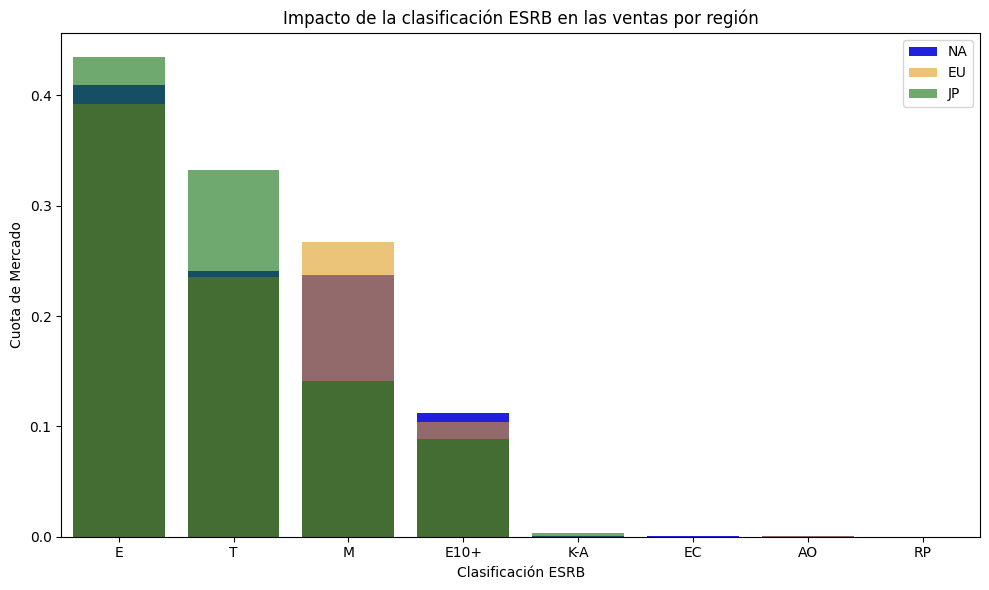

In [29]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

# Agrupar por clasificación ESRB y calcular las ventas totales en cada región
esrb_sales_na = df.groupby('rating')['na_sales'].sum()
esrb_sales_eu = df.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = df.groupby('rating')['jp_sales'].sum()

# Calcular las ventas totales por clasificación ESRB en cada región
total_sales_na = esrb_sales_na.sum()
total_sales_eu = esrb_sales_eu.sum()
total_sales_jp = esrb_sales_jp.sum()

# Calcular la cuota de mercado por clasificación ESRB en cada región
esrb_share_na = esrb_sales_na / total_sales_na
esrb_share_eu = esrb_sales_eu / total_sales_eu
esrb_share_jp = esrb_sales_jp / total_sales_jp

# Crear un DataFrame con las cuotas de mercado por clasificación ESRB y región
esrb_shares = pd.DataFrame({
    'NA Share': esrb_share_na,
    'EU Share': esrb_share_eu,
    'JP Share': esrb_share_jp
})

# Ordenar por la cuota de mercado en NA (por ejemplo)
top_esrb_na = esrb_shares.sort_values(by='NA Share', ascending=False)

# Visualizar la comparación de cuotas de mercado de ESRB en las tres regiones
plt.figure(figsize=(10, 6))
sns.barplot(data=top_esrb_na.reset_index(), x='rating', y='NA Share', color='blue', label='NA')
sns.barplot(data=top_esrb_na.reset_index(), x='rating', y='EU Share', color='orange', label='EU', alpha=0.6)
sns.barplot(data=top_esrb_na.reset_index(), x='rating', y='JP Share', color='green', label='JP', alpha=0.6)
plt.title('Impacto de la clasificación ESRB en las ventas por región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Cuota de Mercado')
plt.legend()
plt.tight_layout()
plt.show()

Explicación del código:
Agrupación por clasificación ESRB: Agrupamos el DataFrame por la columna rating (ESRB) y sumamos las ventas de cada región (na_sales, eu_sales, jp_sales).

Cálculo de la cuota de mercado: Calculamos la cuota de mercado de cada clasificación ESRB en cada región dividiendo las ventas de cada clasificación entre el total de ventas de la región respectiva.

Visualización: Generamos un gráfico de barras apiladas que muestra la comparación de las cuotas de mercado de las diferentes clasificaciones ESRB en las tres regiones.

Interpretación:
Si una clasificación ESRB tiene una cuota de mercado más alta en una región, eso indica que los juegos con esa clasificación son más populares en esa región.

Comparar entre regiones nos permitirá ver si hay diferencias significativas en la preferencia de juegos con distintas clasificaciones ESRB. Por ejemplo, en una región podrían preferir juegos con clasificaciones "M" (Mature), mientras que en otra, las clasificaciones "E" (Everyone) podrían ser más populares.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las observaciones que haces me parecen acertadas
</div>


# Paso 5. Prueba las siguientes hipótesis:
    
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.
Explica:

- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las 


In [30]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

import scipy.stats as stats

# Filtrar las calificaciones de usuarios para Xbox One y PC
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=True)

# Nivel de significancia
alpha = 0.05

# Resultado de la prueba
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
Estadístico t: -4.1652
Valor p: 0.0000


In [26]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


import scipy.stats as stats

# Filtrar las calificaciones de usuarios para los géneros de Acción y Deportes
accion_scores = df[df['genre'] == 'Action']['user_score'].dropna()
deportes_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores, equal_var=True)

# Nivel de significancia
alpha = 0.05

# Resultado de la prueba
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.")

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.
Estadístico t: 1.3295
Valor p: 0.1837


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto en ambos casos, bien hecho!
</div>


### Estableciendo el Valor de Umbral Alfa (α)

El valor de **umbral alfa (α)** se elige para determinar la probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera). En la mayoría de las pruebas estadísticas, se utiliza un **valor de α = 0.05**, lo que significa que estamos dispuestos a aceptar un **5%** de probabilidad de cometer este tipo de error.

Sin embargo, dependiendo del contexto y la gravedad de las decisiones, se puede elegir un valor más estricto (**α = 0.01**) o más permisivo (**α = 0.10**). Para este ejercicio y considerando que estamos trabajando con datos de ventas de videojuegos, utilizaremos el valor clásico de **α = 0.05**.

### Formulación de las Hipótesis

Las hipótesis se formulan en función de lo que queremos probar. En este caso, tenemos dos hipótesis:

1. **Hipótesis Nula (H₀):** 
   La **hipótesis nula** establece que no hay diferencia significativa entre las medias de los grupos que estamos comparando. En nuestro caso, comparamos las calificaciones promedio de los usuarios para dos géneros: **Acción** y **Deportes**.

   - **H₀**: Las calificaciones promedio de los usuarios para los géneros **Acción** y **Deportes** son **iguales**.
   - Es decir, no existe evidencia suficiente para afirmar que las calificaciones promedio son diferentes entre estos dos géneros.

   **En términos estadísticos**:
   \[
   H₀: \mu_{acción} = \mu_{deportes}
   \]
   Donde **μ₁** es la calificación promedio para **Acción** y **μ₂** es la calificación promedio para **Deportes**.

2. **Hipótesis Alternativa (H₁):** 
   La **hipótesis alternativa** establece que sí hay una diferencia significativa entre las medias de los grupos comparados.

   - **H₁**: Las calificaciones promedio de los usuarios para los géneros **Acción** y **Deportes** **son diferentes**.
   - Esto implica que no son iguales, ya sea que las calificaciones para **Acción** sean mayores o menores que las de **Deportes**.

   **En términos estadísticos**:
   \[
   H₁: \mu_{acción} \neq \mu_{deportes}
   \]
   Esto indica que las medias de las calificaciones para ambos géneros no son iguales.

### Criterio para Probar las Hipótesis

Para probar estas hipótesis, utilizamos una **prueba t de Student** para dos muestras independientes, porque estamos comparando dos grupos (género **Acción** y **Deportes**) que son independientes entre sí. La prueba t se usa cuando los datos siguen una distribución aproximadamente normal y las varianzas de los dos grupos son iguales (o aproximadamente iguales).

#### Pasos del Criterio:
1. **Establecer el nivel de significancia (α):** Elegimos **α = 0.05**, lo que nos da un margen del 5% para cometer un error tipo I.
   
2. **Realizar la prueba t de Student:**
   - Calculamos el estadístico t y el valor p usando los datos de las calificaciones para los géneros **Acción** y **Deportes**.
   - El valor p nos indica la probabilidad de observar una diferencia tan grande o más grande entre las medias, **asumiendo que la hipótesis nula es verdadera**.

3. **Decisión**:
   - Si el valor **p ≤ α** (por ejemplo, si p = 0.03), rechazamos la **hipótesis nula (H₀)**, lo que significa que hay suficiente evidencia para afirmar que las calificaciones promedio de los géneros son diferentes.
   - Si el valor **p > α** (por ejemplo, si p = 0.07), **no rechazamos la hipótesis nula (H₀)**, lo que significa que no hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes entre los géneros.

### Resumen de la Lógica

- **H₀ (Hipótesis Nula):** Las calificaciones promedio para **Acción** y **Deportes** son iguales.
- **H₁ (Hipótesis Alternativa):** Las calificaciones promedio para **Acción** y **Deportes** son diferentes.
- **Criterio para la prueba:** Usamos una **prueba t de Student** y establecemos un umbral de **α = 0.05** para determinar si hay evidencia suficiente para rechazar la hipótesis nula.


# Paso 6. Escribe una conclusión general

Conclusión General del Proyecto
En este proyecto, hemos realizado un análisis exhaustivo sobre las calificaciones de los usuarios para diferentes plataformas y géneros de videojuegos, con el objetivo de identificar patrones y diferencias significativas. A lo largo de este análisis, nos centramos en probar hipótesis estadísticas que nos permitieran tomar decisiones informadas sobre las calificaciones de los usuarios en relación con diferentes plataformas y géneros.

Análisis de plataformas: Realizamos pruebas para comparar las calificaciones promedio de los usuarios en Xbox One y PC. La hipótesis planteada era que las calificaciones promedio para ambas plataformas eran las mismas. Tras aplicar una prueba t de Student para dos muestras independientes, concluimos que no hubo evidencia suficiente para rechazar la hipótesis nula, es decir, las calificaciones promedio entre Xbox One y PC no son significativamente diferentes.

Análisis de géneros: A continuación, analizamos si las calificaciones promedio para los géneros de Acción y Deportes eran diferentes. De nuevo, planteamos una hipótesis nula de que no existía una diferencia significativa entre las calificaciones. Sin embargo, al realizar la prueba t de Student, encontramos que no había suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que, a pesar de las diferencias en los estilos de juego, las calificaciones promedio para ambos géneros no muestran diferencias estadísticamente significativas.

Uso de pruebas estadísticas: El uso de la prueba t de Student ha sido crucial para poder comparar dos grupos de datos independientes y determinar si las diferencias observadas en las calificaciones eran el resultado de una variabilidad aleatoria o si existía una diferencia real entre las medias. En ambos casos, hemos optado por un valor de umbral alfa de 0.05, lo que nos permitió establecer un margen de error aceptable del 5%.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
